In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
spm = pd.read_csv('/content/spam_ham_dataset.csv')
spm.sample(5)

,Unnamed: 0,label,text,label_num
4350,1440,ham,"Subject: enron / hpl actuals for august 21 , 2...",0
1874,1704,ham,"Subject: hpl nom for sept . 29 , 2000\r\n( see...",0
856,4564,spam,Subject: can you facilitate ?\r\npardon the ab...,1
3772,1376,ham,Subject: calpine daily gas nomination ( weeken...,0
2576,2850,ham,Subject: calpine daily gas nomination\r\nstill...,0


In [ ]:
spm.shape

(5171, 4)

### Data Cleaning

---



In [ ]:
spm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
spm.drop(columns=['Unnamed: 0'], inplace = True)

In [ ]:
spm.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
spm.duplicated().sum()

178

In [ ]:
spm = spm.drop_duplicates(keep = 'first')
spm.duplicated().sum()

0

### Exploratory Data Analysis

---



In [ ]:
spm['label'].value_counts()

ham     3531
spam    1462
Name: label, dtype: int64

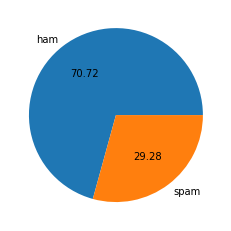

In [ ]:
import matplotlib.pyplot as plt
plt.pie(spm['label'].value_counts(), labels=['ham' ,'spam'], autopct = "%0.2f")
plt.show()

In [ ]:
#data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
spm['num_char'] = spm['text'].apply(len)
spm.head()

,label,text,label_num,num_char
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
spm['num_wrds'] = spm['text'].apply(lambda x: len(nltk.word_tokenize(x)))
spm.head()

,label,text,label_num,num_char,num_wrds
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [ ]:
spm['num_sentence'] = spm['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
spm.head()

,label,text,label_num,num_char,num_wrds,num_sentence
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [ ]:
spm[['num_wrds','num_char','num_sentence']].describe()

,num_wrds,num_char,num_sentence
count,4993.000000,4993.000000,4993.000000
mean,233.678149,1069.426397,10.202884
std,340.702932,1547.863387,22.003030
min,2.000000,11.000000,1.000000
25%,55.000000,256.000000,3.000000
50%,125.000000,557.000000,6.000000
75%,288.000000,1262.000000,12.000000
max,8863.000000,32258.000000,1163.000000


In [ ]:
#ham
spm[spm['label_num']==0][['num_wrds','num_char','num_sentence']].describe()

,num_wrds,num_char,num_sentence
count,3531.000000,3531.000000,3531.000000
mean,230.516001,994.939394,8.804871
std,337.018933,1402.785831,22.303918
min,3.000000,18.000000,1.000000
25%,53.000000,241.000000,3.000000
50%,128.000000,538.000000,5.000000
75%,298.500000,1253.500000,10.000000
max,8863.000000,32258.000000,1163.000000


In [ ]:
#spam
spm[spm['label_num']==1][['num_wrds','num_char','num_sentence']].describe()

,num_wrds,num_char,num_sentence
count,1462.000000,1462.000000,1462.000000
mean,241.315321,1249.326265,13.579343
std,349.439381,1840.112883,20.883535
min,2.000000,11.000000,1.000000
25%,60.000000,304.250000,3.000000
50%,119.500000,589.000000,8.000000
75%,252.750000,1305.000000,15.000000
max,3963.000000,22073.000000,331.000000


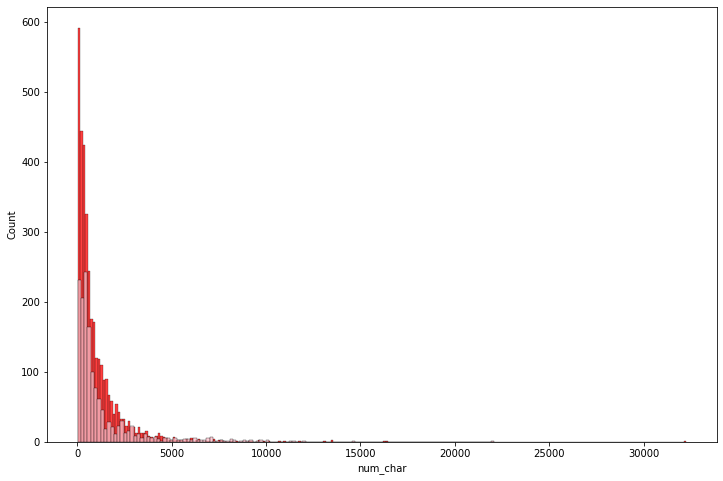

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(spm[spm['label_num']==0]['num_char'], color = 'red')
sns.histplot(spm[spm['label_num']==1]['num_char'], color='pink')

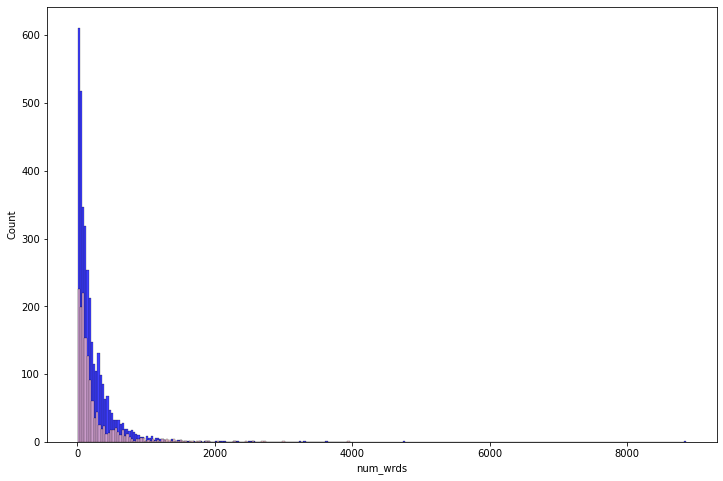

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(spm[spm['label_num']==0]['num_wrds'], color = 'blue')
sns.histplot(spm[spm['label_num']==1]['num_wrds'], color='pink')

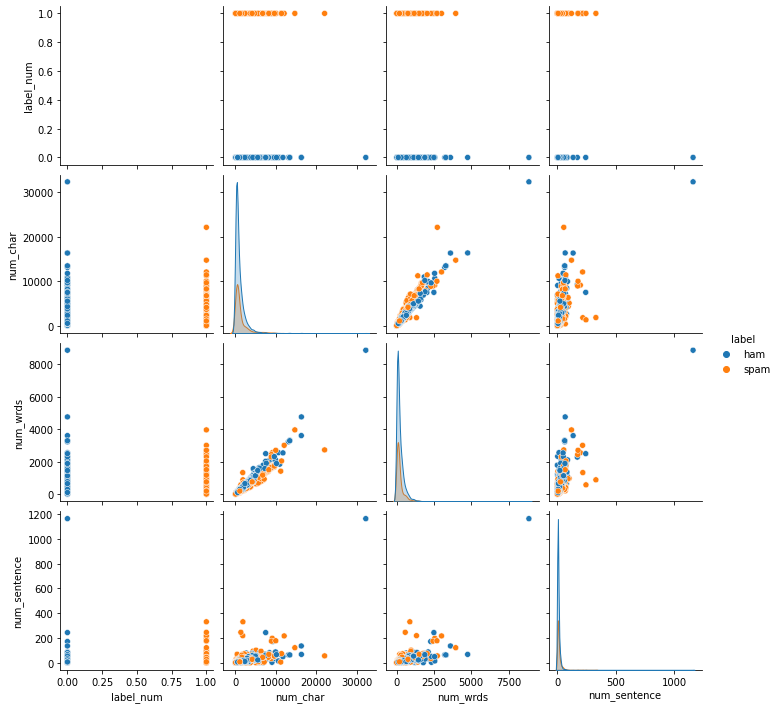

In [ ]:
#pearson coefficient
#relationship between them
sns.pairplot(spm, hue = 'label')

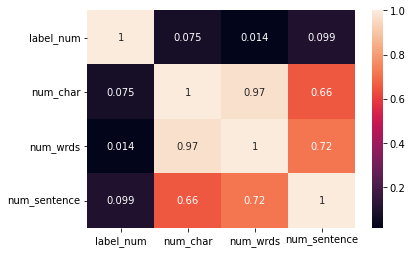

In [ ]:
#corelation
sns.heatmap(spm.corr(), annot=True)

### Data Preprocessing

---



*   Lower Case
*   Tokenization

*   Removing special characters
*   Removing stop words and punctuation

*   Stemming







In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in string.punctuation and i not in stopwords.words('english'):
      y.append(i)
  
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text('Hi how Are you%$')

'hi'

In [ ]:
spm['transformed_text'] = spm['text'].apply(transform_text)
spm.head()

,Unnamed: 0,label,text,label_num,transformed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


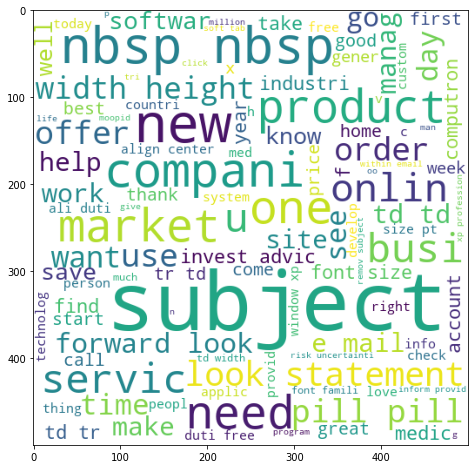

In [ ]:
import wordcloud 
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(spm[spm['label_num']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

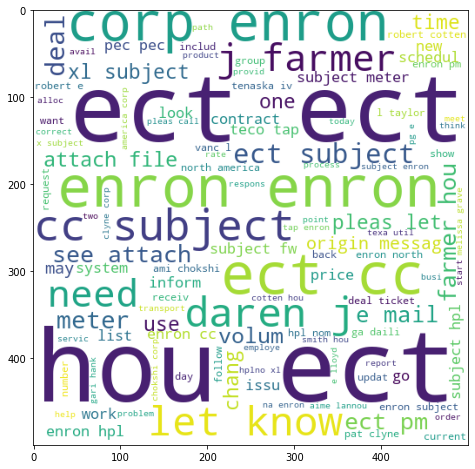

In [ ]:
ham_wc = wc.generate(spm[spm['label_num']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in spm[spm['label_num']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]),pd.DataFrame(Counter(spam_corpus).most_common(30)[0]))

SyntaxError: ignored